Map:   0%|          | 0/12575 [00:00<?, ? examples/s]Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Map: 100%|██████████| 1586/1586 [00:00<00:00, 9031.85 examples/s]


Training banglabert_model_1...


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_12460\930621584.py:97: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.789400,0.649721,0.726228,0.696579
2,0.545900,0.634153,0.751755,0.733841
3,0.395900,0.702848,0.753669,0.757066
4,0.252500,0.823529,0.759413,0.757115


Training roberta_model_1...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_12460\930621584.py:97: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.076100,1.071806,0.397575,0.226200
2,1.076400,1.072497,0.397575,0.226200
3,1.075600,1.071640,0.397575,0.226200
4,1.075000,1.070991,0.397575,0.226200
5,1.073900,1.072482,0.397575,0.226200
6,1.076400,1.073216,0.397575,0.226200


Training banglabert_model_2...


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_12460\930621584.py:97: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.794000,0.654845,0.728781,0.708254
2,0.552500,0.619119,0.758775,0.747783
3,0.405600,0.690740,0.768347,0.772120
4,0.261900,0.787181,0.762604,0.763215


Training roberta_model_2...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_12460\930621584.py:97: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.073900,1.064663,0.413529,0.308177
2,1.066400,1.066208,0.398213,0.227576
3,1.064900,1.056057,0.404595,0.275418
4,1.057500,1.049311,0.404595,0.286966
5,1.051300,1.043731,0.435227,0.406829
6,1.036200,0.977464,0.518188,0.479362
7,0.949200,0.933995,0.569241,0.546713
8,0.927700,0.908653,0.577537,0.553583
9,0.900300,0.904555,0.572431,0.560421
10,0.893300,0.910440,0.585195,0.561317


Training banglabert_model_3...


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_12460\930621584.py:97: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.794400,0.644725,0.726867,0.712034
2,0.563100,0.648221,0.752393,0.741833
3,0.412800,0.705809,0.768985,0.769985


C:\Users\USERAS\AppData\Local\Temp\ipykernel_12460\930621584.py:129: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, tokenizer=tokenizer)



✅ Ensemble Model Accuracy: 0.7579

Classification Report:

              precision    recall  f1-score   support

     Neutral       0.62      0.43      0.51       361
    Positive       0.79      0.86      0.82       654
    Negative       0.78      0.84      0.81       571

    accuracy                           0.76      1586
   macro avg       0.73      0.71      0.71      1586
weighted avg       0.75      0.76      0.75      1586



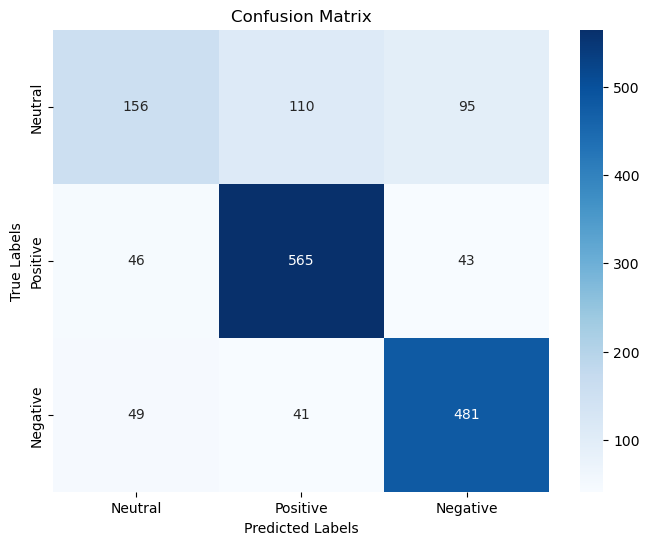

In [5]:
import pandas as pd
import numpy as np
import torch
from datasets import Dataset, DatasetDict
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification, 
    Trainer, TrainingArguments, EarlyStoppingCallback
)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Clear GPU cache
torch.cuda.empty_cache()

# Constants
DATA_PATH = "data/"
LABELS = ["Neutral", "Positive", "Negative"]
LABEL2ID = {label: idx for idx, label in enumerate(LABELS)}
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Model Names
BERT_MODEL = 'csebuetnlp/banglabert'
ROBERTA_MODEL = 'roberta-base'

# Load datasets
def load_and_preprocess(file_path):
    df = pd.read_csv(file_path)
    df = df.dropna()
    df["Label"] = df["Label"].map({0: "Neutral", 1: "Positive", 2: "Negative"})
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    return df

train_df = load_and_preprocess(DATA_PATH + "Train.csv")
val_df = load_and_preprocess(DATA_PATH + "Val.csv")
test_df = load_and_preprocess(DATA_PATH + "Test.csv")

# Convert to HuggingFace Dataset
def convert_to_dataset(df):
    dataset = Dataset.from_pandas(df[['Data', 'Label']].rename(columns={"Data": "text", "Label": "label"}))
    return dataset

dataset = DatasetDict({
    "train": convert_to_dataset(train_df),
    "validation": convert_to_dataset(val_df),
    "test": convert_to_dataset(test_df),
})

# Encode labels numerically
dataset = dataset.map(lambda batch: {"label": [LABEL2ID[label] for label in batch["label"]]}, batched=True)

# Load Tokenizers
tokenizer_bert = AutoTokenizer.from_pretrained(BERT_MODEL)
tokenizer_roberta = AutoTokenizer.from_pretrained(ROBERTA_MODEL)

# Tokenization
def tokenize(batch, tokenizer):
    return tokenizer(batch["text"], padding="max_length", truncation=True)

dataset_bert = dataset.map(lambda batch: tokenize(batch, tokenizer_bert), batched=True)
dataset_roberta = dataset.map(lambda batch: tokenize(batch, tokenizer_roberta), batched=True)

# Prepare datasets for training
def prepare_dataset(dataset):
    return dataset.remove_columns(["text"]).rename_column("label", "labels").with_format("torch")

dataset_bert = prepare_dataset(dataset_bert)
dataset_roberta = prepare_dataset(dataset_roberta)

# Training function
def train_model(model_name, tokenizer, dataset, output_dir, lr=2e-5, epochs=10):
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(LABELS)).to(DEVICE)

    training_args = TrainingArguments(
        output_dir=output_dir,
        evaluation_strategy="epoch",
        learning_rate=lr,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=epochs,
        weight_decay=0.01,
        save_strategy="epoch",
        logging_dir=f"./logs/{output_dir}",
        load_best_model_at_end=True,
        metric_for_best_model="eval_loss",
        greater_is_better=False,
        save_total_limit=2,
    )

    def compute_metrics(eval_pred):
        preds = np.argmax(eval_pred.predictions, axis=1)
        return {
            "accuracy": accuracy_score(eval_pred.label_ids, preds),
            "f1": f1_score(eval_pred.label_ids, preds, average="weighted"),
        }

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=dataset["train"],
        eval_dataset=dataset["validation"],
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
    )

    trainer.train()
    return model

# Train multiple models
models_info = [
    (BERT_MODEL, tokenizer_bert, dataset_bert, "banglabert_model_1"),
    (ROBERTA_MODEL, tokenizer_roberta, dataset_roberta, "roberta_model_1"),
    (BERT_MODEL, tokenizer_bert, dataset_bert, "banglabert_model_2"),
    (ROBERTA_MODEL, tokenizer_roberta, dataset_roberta, "roberta_model_2"),
    (BERT_MODEL, tokenizer_bert, dataset_bert, "banglabert_model_3"),
]

models = []
for model_name, tokenizer, dataset, output_dir in models_info:
    print(f"Training {output_dir}...")
    model = train_model(model_name, tokenizer, dataset, output_dir)
    models.append((model, tokenizer))

# Ensemble Prediction
def ensemble_predict(models, dataset):
    preds_list = []
    for model, tokenizer in models:
        trainer = Trainer(model=model, tokenizer=tokenizer)
        predictions = trainer.predict(dataset["test"]).predictions
        preds = torch.softmax(torch.tensor(predictions), dim=-1)
        preds_list.append(preds)

    avg_preds = torch.mean(torch.stack(preds_list), dim=0)
    final_preds = torch.argmax(avg_preds, dim=1).numpy()
    return final_preds

# Make ensemble predictions
ensemble_preds = ensemble_predict(models, dataset)

# Evaluate
true_labels = dataset["test"]["labels"]
accuracy = accuracy_score(true_labels, ensemble_preds)
print(f"\n✅ Ensemble Model Accuracy: {accuracy:.4f}\n")

# Classification report
print("Classification Report:\n")
print(classification_report(true_labels, ensemble_preds, target_names=LABELS))

# Confusion Matrix
conf_mat = confusion_matrix(true_labels, ensemble_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
